# COGS 108 - Data Checkpoint

# Names

- Karthik Guruvayurappan
- Evan Chen
- Katherine Kim
- Brandon Born

<a id='research_question'></a>
# Research Question

Is there a relationship between government policies and agreements and reduced global carbon emissions of countries from 1970 to 2018?

# Dataset(s)

- Dataset Name: EDGAR CO2 Emissions 1970-2018 Data
- Link to the dataset: https://github.com/openclimatedata/edgar-co2-emissions
- Number of observations: 50764
This datasets includes observations from 1970 to 2018 of CO2 emissions by country and sector including building, power industry, transport, and other industrial combustion. 


- Dataset Name: Climate Policy Dataset 
- Link to the dataset: https://climatepolicydatabase.org/policies
- Number of observations: 5120
This dataset contains observations of all climate policies by country, sector, its current status, decision year from as early as 1927, and policy type (e.g. Agricultural, energy service demand, energy efficiency). 



We are interested in looking at carbon emissions over time and seeing if there is a substantial change once a climate policy is implemented. Therefore, the EDGAR CO2 emissions data set offers us a continual set of data to see trends of emissions, and the Climate Policy Dataset can be combined to denote when policies were implemented and if carbon emissions decreased as a result. We can join the policy dataset with the carbon emissions data by year, and then analyze the change in carbon emissions over time using these datasets. 

# Setup

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Both the Edgar CO2 Emissions Dataset and Climate Policy Dataset are contained in a CSV file which means the data for both is in a semi-structured format. The data itself is already tidy. Each variable we are measuring is in a single column while every observation of a variable is in a different row resulting in rectangular data. All that is left is to clean the data. 

Our data cleaning steps include: 
- identifying any null values and dropping (if applicable) 
- checking the data for duplicate entries
- changing column names (if applicable)
- standardizing the responses (if applicable). 

In [42]:
# read in Climate Policy Dataset
climate_policy_data = pd.read_csv('./data/climate_policy_database_policies_export.csv')
climate_policy_data.head()

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN


In [43]:
# list columns from dataset
climate_policy_data.columns

Index(['Policy ID', 'Country ISO', 'Policy name', 'Policy Title',
       'Jurisdiction', 'Supranational region', 'Country',
       'Subnational region or state', 'City or local',
       'Type of policy instrument', 'Sector name', 'Policy description',
       'Policy type', 'Policy stringency', 'Implementation state',
       'Date of decision', 'Start date of implementation',
       'End date of implementation', 'High impact', 'Policy objective',
       'Source or references', 'Impact indicators: comments',
       'Impact indicators: name', 'Impact indicators: value',
       'Impact indicators: base year', 'Impact indicators: target year'],
      dtype='object')

In [44]:
# select necessary columns from the dataset
climate_policy_data = climate_policy_data[['Country ISO', 'Policy name', 'Policy Title', 'Country', 
                                           'Sector name', 'Policy type', 'Date of decision', 
                                           'Policy objective']]

In [45]:
# analyze nans from dataset
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         496
Date of decision    132
Policy objective     60
dtype: int64

In [46]:
# drop nan values for necesary columns for analysis
(climate_policy_data['Date of decision'].isna()).sum()

132

In [55]:
climate_policy_data = climate_policy_data.dropna(axis=0, subset=['Date of decision'])
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


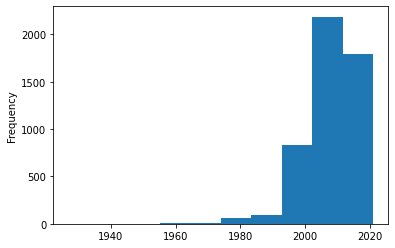

In [57]:
# generate plot of years to analyze values
climate_policy_data['Date of decision'].plot(kind='hist')

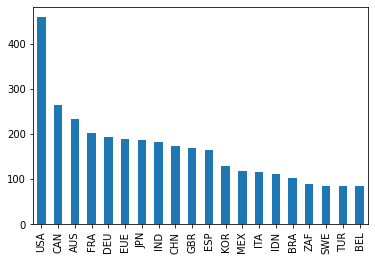

In [61]:
# generate plot of top countries to analyze values
climate_policy_data['Country ISO'].value_counts().nlargest(20).plot(kind='bar')

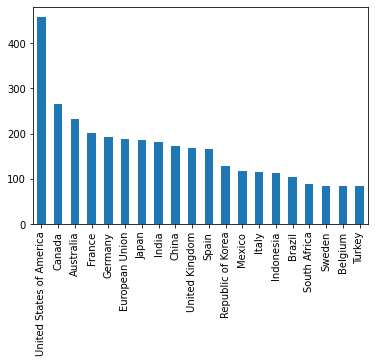

In [67]:
# generate same plot using other country label
climate_policy_data['Country'].value_counts().nlargest(20).plot(kind='bar')

In [62]:
# get unique countries
climate_policy_data['Country ISO'].unique()

array(['USA', 'BIH', 'MKD', 'PHL', 'CPV', 'VUT', 'BRA', 'VNM', 'UKR',
       'THA', 'ZAF', 'RUS', 'MAR', 'MEX', 'JPN', 'IDN', 'EUE', 'ETH',
       'COL', 'CHN', 'CAN', 'AUS', 'ARG', 'PYF', 'AND', 'MCO', 'GBR',
       'NOR', 'CHE', 'MDA', 'NZL', 'FJI', 'MHL', 'TON', 'PNG', 'BRN',
       'KOR', 'KHM', 'SGP', 'MNG', 'KGZ', 'PRK', 'ECU', 'SYR', 'BGD',
       'NPL', 'MDV', 'AGO', 'LBN', 'ARE', 'SSD', 'KEN', 'RWA', 'ZMB',
       'GRD', 'ISL', 'CHL', 'PER', 'SEN', 'SUR', 'CRI', 'PAN', 'NIC',
       'JAM', 'DOM', 'CMR', 'GRC', 'SWE', 'IND', 'FRA', 'ESP', 'ITA',
       'SAU', 'SDN', 'DNK', 'BEL', 'DEU', 'LKA', 'BGR', 'TUR', 'UZB',
       'SLB', 'NLD', 'TGO', 'LUX', 'COD', 'FIN', 'TUN', 'SVK', 'GMB',
       'MNE', 'URY', 'TLS', 'TZA', 'IRQ', 'ISR', 'PRY', 'NGA', 'BEN',
       'AFG', 'ERI', 'NRU', 'NAM', 'MOZ', 'FSM', 'ZWE', 'STP', 'GAB',
       'GHA', 'GEO', 'GUY', 'GTM', 'GNB', 'GNQ', 'GIN', 'HTI', 'COK',
       'CIV', 'NER', 'MUS', 'MRT', 'NIU', 'MLI', 'MYS', 'MWI', 'MDG',
       'LIE', 'LBR',

In [66]:
# ensure there is a one to one mapping between Country ISO and Country
print(climate_policy_data['Country ISO'].nunique())
print(climate_policy_data['Country'].nunique())

194
194


In [70]:
# analyze sector name data
climate_policy_data['Sector name'].value_counts()

General                                                                                                                                                   979
Electricity and heat, Renewables                                                                                                                          693
Electricity and heat                                                                                                                                      288
Transport                                                                                                                                                 243
Buildings                                                                                                                                                 206
                                                                                                                                                         ... 
Electricity and heat, Buildings, Renewables         

In [72]:
# check data types
climate_policy_data.dtypes

Country ISO          object
Policy name          object
Policy Title         object
Country              object
Sector name          object
Policy type          object
Date of decision    float64
Policy objective     object
dtype: object

In [73]:
# check data shape
climate_policy_data.shape

(4988, 8)

In [75]:
# drop duplicates
climate_policy_data = climate_policy_data.drop_duplicates()

In [76]:
# check data shape
climate_policy_data.shape

(4754, 8)

In [78]:
# Reads in dataset from where it was saved in datahub
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv')
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


In [79]:
# Check for null values, only null values appear in emissions column
df.isna().any()

Code         False
Name         False
Sector       False
Year         False
Emissions     True
dtype: bool

In [80]:
# number of null/missing values in Emissions column
df['Emissions'].isnull().sum()

387

In [82]:
#Seeing the total emissions by country in order to see if the null values affect calculations, #which they don’t so we will keep the null values in the dataset
df.groupby('Name').agg('sum').sort_values(by='Emissions', ascending=False)['Emissions']

Name
United States                                   256355.650474
China                                           215491.859571
Russia                                           85982.870481
Japan                                            55297.538635
Germany                                          46955.011838
                                                    ...      
Kiribati                                             1.309827
Falkland Islands                                     0.743025
Anguilla                                             0.583611
Saint Helena, Ascension and Tristan da Cunha         0.336218
Faroes                                               0.074013
Name: Emissions, Length: 210, dtype: float64

In [84]:
# No duplicate rows
df.duplicated().any()

False

In [85]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


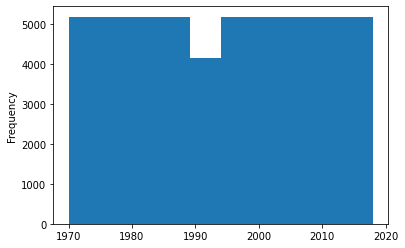

In [88]:
# check distribution of years
df['Year'].plot(kind='hist')

In [89]:
# check distribution of countries
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

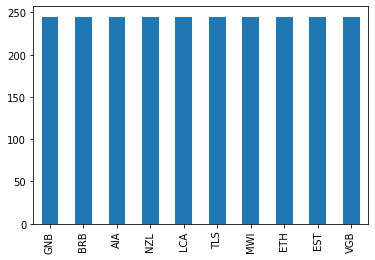

In [90]:
df['Code'].value_counts().nlargest(10).plot(kind='bar')

In [95]:
# ensure one to one mapping between country names and codes
print(df['Name'].nunique())
print(df['Code'].nunique())

210
210


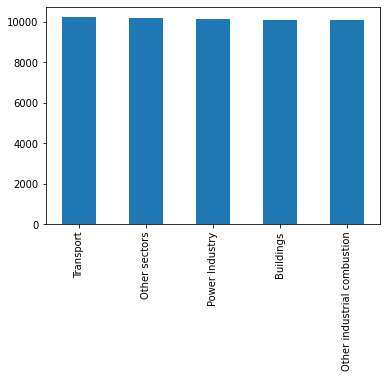

In [104]:
# check sector distribution
df['Sector'].value_counts().nlargest(5).plot(kind='bar')

In [105]:
# check sector value counts
df['Sector'].value_counts()

Transport                      10241
Other sectors                  10192
Power Industry                 10143
Buildings                      10094
Other industrial combustion    10094
Name: Sector, dtype: int64